In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/backtest_data_convergence.csv')
# df.head()

full_data = pd.read_csv('/content/drive/MyDrive/wealthnet_features_returns/midcap.csv')
# full_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cutoff_timestamp = '2024-02-16 10:14:00+05:30'
cutoff_timestamp = pd.to_datetime(cutoff_timestamp)
full_data['Datetime'] = pd.to_datetime(full_data['Datetime'])
full_data = full_data[full_data['Datetime'] >= cutoff_timestamp]
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df[df['Datetime'] >= cutoff_timestamp]


In [ ]:
full_data= full_data.drop_duplicates(subset='Datetime', keep='first')
df = df.drop_duplicates(subset='Datetime', keep='first')

In [ ]:
#Check for mismatched rows between dataframes
import pandas as pd

df1 = full_data.copy()
df2 = df.copy()

# Ensure both dataframes are sorted by timestamp

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

df1.sort_values('Datetime', inplace=True)
df2.sort_values('Datetime', inplace=True)

# Use iterators to go through both dataframes
i, j = 0, 0
n1, n2 = len(df1), len(df2)

# Loop through both DataFrames as long as we have data in both
while i < n1 and j < n2:
    ts1 = df1.iloc[i]['Datetime']
    ts2 = df2.iloc[j]['Datetime']

    if ts1 == ts2:
        # If timestamps match, move to the next row in both DataFrames
        i += 1
        j += 1
    else:
        # If timestamps don't match, print the rows and advance the index of the earlier timestamp
        print("Mismatch found:")
        print("DataFrame 1 row:", df1.iloc[i]['Datetime'])
        print("DataFrame 2 row:", df2.iloc[j]['Datetime'])

        if ts1 < ts2:
            i += 1
        else:
            j += 1

# Check for any remaining rows if one DataFrame is longer
while i < n1:
    print("Remaining in DataFrame 1:", df1.iloc[i]['Datetime'])
    i += 1
while j < n2:
    print("Remaining in DataFrame 2:", df2.iloc[j]['Datetime'])
    j += 1


In [ ]:
full_data = full_data.iloc[:,:5]
full_data.reset_index(inplace=True)

In [ ]:
df.reset_index(inplace=True)
full_data['midcap_observed_return'] = df['10_Min_Returns_Midcap']
full_data['midcap_predicted_return'] = df['Predicted_10_Min_Returns_Midcap']

In [ ]:
full_data.drop('index',axis=1,inplace=True)
full_data['Datetime'] = pd.to_datetime(full_data['Datetime'])
full_data.set_index('Datetime',inplace=True)
full_data['Volume'] = 0
full_data['OpenInterest'] = 0

In [ ]:
full_data
#OHLC + Rolling 10 minute observed and predicted returns for midcap, to be used in the convergence strategy

,Open,High,Low,Close,midcap_observed_return,midcap_predicted_return,Volume,OpenInterest
Datetime,,,,,,,,
2024-02-16 10:14:00+05:30,10951.20,10956.15,10949.40,10955.75,8.084481,3.839187,0,0
2024-02-16 10:15:00+05:30,10956.25,10961.60,10955.05,10955.30,11.743257,2.712653,0,0
2024-02-16 10:16:00+05:30,10956.45,10958.60,10956.25,10957.75,8.814315,2.333168,0,0
2024-02-16 10:17:00+05:30,10957.75,10958.35,10951.40,10951.70,1.461174,-1.770861,0,0
2024-02-16 10:18:00+05:30,10951.35,10955.50,10950.75,10953.30,2.008931,1.103288,0,0
...,...,...,...,...,...,...,...,...
2024-04-30 15:25:00+05:30,11054.75,11056.60,11052.05,11052.75,-4.340925,-7.360967,0,0
2024-04-30 15:26:00+05:30,11052.05,11056.10,11051.45,11054.45,-0.904531,-6.204583,0,0
2024-04-30 15:27:00+05:30,11054.70,11060.15,11053.75,11059.45,4.885087,-3.849772,0,0


0.844789356984479
13.798202746874304
0.16970342137262362


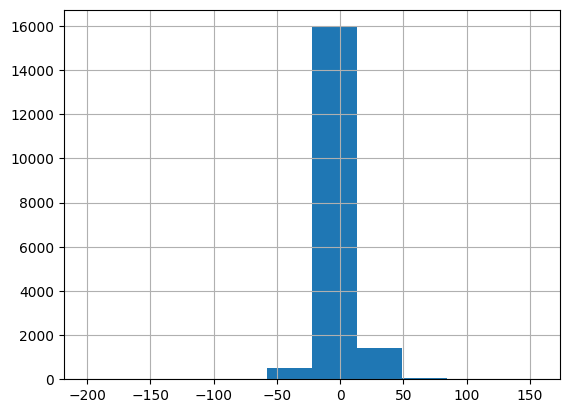

In [ ]:
full_data['midcap_observed_return'].hist()
#Get percentage of data within 1 std dev using lambda
print(full_data['midcap_observed_return'][abs(full_data['midcap_observed_return']) < full_data['midcap_observed_return'].std()].count()/full_data['midcap_observed_return'].count())
print(full_data['midcap_observed_return'].std())
print(full_data['midcap_observed_return'].mean())

8.731917368587158

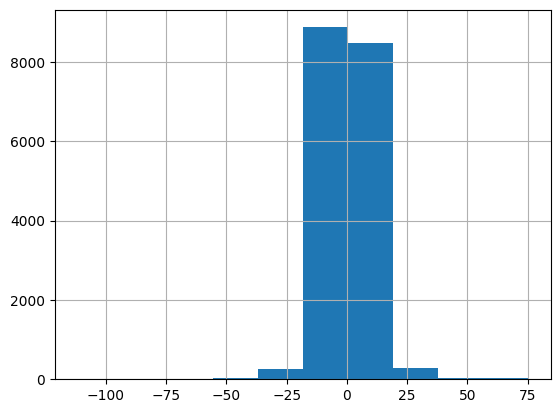

In [ ]:
full_data['midcap_predicted_return'].hist()
full_data['midcap_predicted_return'].std()

Trading Strategy:
- Goal is to capitalize on the difference between expected and observed returns for Midcap. If the difference between expected/observed returns is greater than 1 std deviation, consider it an abnormality and expect the returns to converge in the future (due to illiquidity of the index).
- Place long trades on candles where expected 10 min return is greater than observed return by a difference of more than 1 std dev (not noisy).
- Place short trades where expected return is lesser than observed return by a difference of more than 1 std dev.
- 3 Exit Conditions:
  1. Convergence: If long, and (expected-observed)<0, exit. If short, and (expected-observed)>0, exit.
  2. Profit/Loss amount: If we cross an absolute pnl amount greater than the  value of the average of the not-noisy returns (>1 std dev), exit trade.
  3. Time: Since strategy is for 10 min returns, if we cross 10 rows of data without the above 2 conditions being fulfilled, exit trade.

In [ ]:
full_data.reset_index(inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

std_dev = full_data['midcap_observed_return'].std()

std_dev_difference = (full_data['midcap_observed_return'] - full_data['midcap_predicted_return']).std()
print(std_dev_difference)

trades = []
current_trade = None
initial_cash = 100000
cash_balance = initial_cash
cash_movements = []  # Track cash balance over time
timestamps = []  # Corresponding timestamps for cash movements
traded_values = []

for i, row in full_data.iterrows():
    timestamp = row['Datetime']
    actual_return = row['midcap_observed_return']
    predicted_return = row['midcap_predicted_return']
    difference = predicted_return - actual_return
    exit_condition = -1

#Check thresholds where we have mean-reverting versus momentum states (when is midcap ra)

    # Check for trade entry
    if not current_trade:
        if abs(difference) > std_dev:
            # num_shares = cash_balance // row['Open']
            current_trade = {
                'entry_timestamp': timestamp,
                'entry_price': row['Close'],
                'entry_index': i,
                'type': 'short' if difference > 0 else 'long',
                'difference_entry': difference
                # 'num_shares': num_shares
            }

    # Trade management and exit conditions
    elif current_trade:
        # Calculate pnl for the current trade in basis points
        if current_trade['type'] == 'long':
            pnl = (row['Close'] - current_trade['entry_price']) / current_trade['entry_price'] * 10000
        else:
            pnl = (current_trade['entry_price'] - row['Close']) / row['Close'] * 10000

        # Conditions to close the trade
        exit_trade = False
        if (current_trade['type'] == 'long' and difference >= 0) or (current_trade['type'] == 'short' and difference  <= 0):
            exit_trade = True
            exit_condition = 0
        elif abs(pnl) > std_dev :
            exit_trade = True
            exit_condition = 1
        elif i - current_trade['entry_index'] >=10:  # Time-based exit
            exit_trade = True
            exit_condition = 2

        if exit_trade:
            current_trade.update({
                'exit_timestamp': timestamp,
                'exit_index': i,
                'exit_price': row['Close'],
                'pnl': pnl,
                'traded_value': current_trade['entry_price'],
                'difference_exit': difference,
                'exit_condition': exit_condition
            })
            cash_balance += current_trade['pnl']  # Adjust cash balance by pnl
            traded_values.append(current_trade['traded_value'])
            trades.append(current_trade)
            cash_movements.append(cash_balance)
            timestamps.append(timestamp)
            current_trade = None

# Convert trades to DataFrame
trades_df = pd.DataFrame(trades)

# Calculate overall performance
total_pnl = trades_df['pnl'].sum()
number_of_trades = len(trades_df)
total_traded_value = sum(traded_values)

print(f'Total PnL: {total_pnl}')  # Basis points
print(f'Number of Trades: {number_of_trades}')
print(f'Total Traded Value: {total_traded_value}')
print(f'Profit BIPS per rupee unit of Traded Value: {(total_pnl / total_traded_value) * 10000}')

print(trades_df)


9.774477275654599
Total PnL: 370.8352824600872
Number of Trades: 573
Total Traded Value: 6132582.750000005
Profit BIPS per rupee unit of Traded Value: 0.6046967445487579
              entry_timestamp  entry_price  entry_index   type  \
0   2024-02-16 13:39:00+05:30     10994.40          205   long   
1   2024-02-16 14:40:00+05:30     11015.10          266   long   
2   2024-02-19 09:53:00+05:30     11035.40          354   long   
3   2024-02-19 10:25:00+05:30     11038.95          386  short   
4   2024-02-19 14:37:00+05:30     11026.55          638  short   
..                        ...          ...          ...    ...   
568 2024-04-30 10:58:00+05:30     11097.65        17768  short   
569 2024-04-30 11:08:00+05:30     11110.60        17778   long   
570 2024-04-30 11:29:00+05:30     11119.90        17799   long   
571 2024-04-30 14:42:00+05:30     11121.05        17992  short   
572 2024-04-30 15:02:00+05:30     11059.65        18012  short   

     difference_entry            exit

In [ ]:
save_path = '/content/drive/My Drive/wealthnet_features_returns/trades.csv'
trades_df.to_csv(save_path)

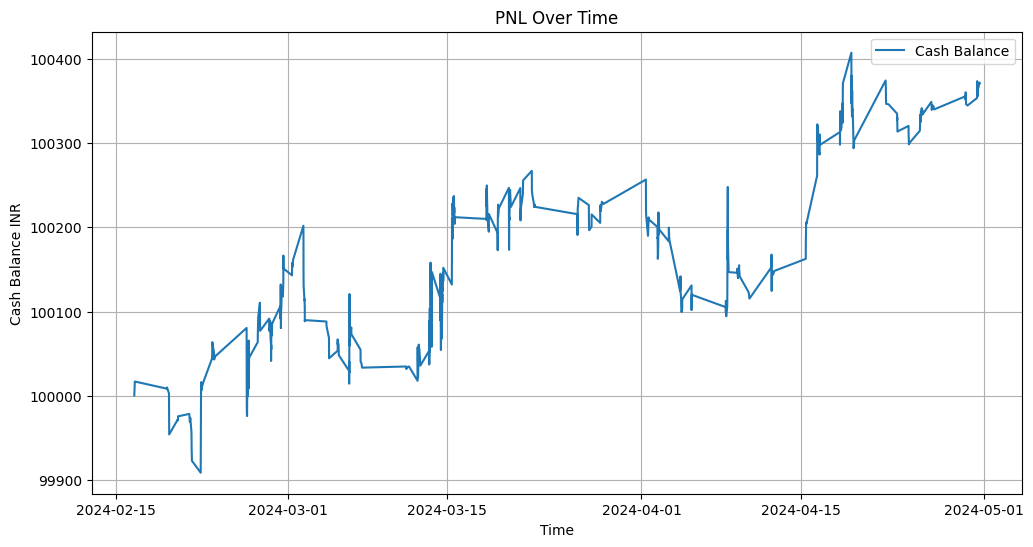

In [ ]:
#Plot the cash movements
plt.figure(figsize=(12, 6))
plt.plot(timestamps, cash_movements, label='Cash Balance')
plt.xlabel('Time')
plt.ylabel('Cash Balance INR')
plt.title('PNL Over Time')
plt.legend()
plt.grid(True)

plt.savefig('/content/drive/My Drive/cash_balance_over_time.png')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Using full_data dataframe

# Calculate the standard deviation of the actual returns
std_dev = full_data['midcap_observed_return'].std()

# Initialize variables
trades = []
current_trade = None
pnl = 0  # pnl here is used to signify the profit/loss amount for that specific trade, used during exits
initial_cash = 100000
cash_balance = initial_cash
cash_movements = []  # To track cash balance over time
timestamps = []  # To track the corresponding timestamps
traded_values = []  # To track traded values

# Iterating manually
for i, row in full_data.iterrows():
    timestamp = row['Datetime']
    actual_return = row['midcap_observed_return']
    predicted_return = row['midcap_predicted_return']
    difference = predicted_return - actual_return

    # Check for trade entry
    if not current_trade:
        if difference > std_dev:
            # num_shares = cash_balance // row['Open']
            current_trade = {
                'entry_timestamp': timestamp,
                'entry_price': row['Open'],
                'entry_index': i,
                'type': 'long',
                # 'num_shares': num_shares
            }
            pnl = 0  # Reset PNL for new trade
        elif difference < -std_dev:
            # num_shares = cash_balance // row['Open']
            current_trade = {
                'entry_timestamp': timestamp,
                'entry_price': row['Open'],
                'entry_index': i,
                'type': 'short',
                # 'num_shares': num_shares
            }
            pnl = 0  # Reset PNL for new trade

    # Check if we are currently in a trade
    if current_trade:
        # Calculate pnl for the current trade in basis points
        pnl = (row['Close'] - current_trade['entry_price'])/current_trade['entry_price'] * 10000 if current_trade['type'] == 'long' else (current_trade['entry_price'] - row['Close'])/row['Close'] * 10000
        # pnl = pnl - 2 * current_trade['num_shares'] #Account for per trade transaction costs in basis points

        # Check for exit conditions:
        # Difference = Expected Return - Observed Return
        # 1. Approaching Convergence
        if (current_trade['type'] == 'long' and difference <= 0) or (current_trade['type'] == 'short' and difference >= 0):
            # continue
            current_trade['exit_timestamp'] = timestamp
            current_trade['exit_index'] = i
            current_trade['exit_price'] = row['Close']
            current_trade['pnl'] = pnl
            current_trade['traded_value'] =current_trade['entry_price']  #Calculate traded value
            cash_balance += pnl
            traded_values.append(current_trade['traded_value'])
            trades.append(current_trade)
            current_trade = None
            cash_movements.append(cash_balance)
            timestamps.append(timestamp)


        # 2. Profit/Loss amount
        elif abs(pnl) > (std_dev):
            current_trade['exit_timestamp'] = timestamp
            current_trade['exit_index'] = i
            current_trade['exit_price'] = row['Close']
            current_trade['pnl'] = pnl
            current_trade['traded_value'] = current_trade['entry_price']
            cash_balance += pnl
            traded_values.append(current_trade['traded_value'])
            trades.append(current_trade)
            current_trade = None
            cash_movements.append(cash_balance)
            timestamps.append(timestamp)


        # 3. Time
        elif i - current_trade['entry_index'] >= 10:
            current_trade['exit_timestamp'] = timestamp
            current_trade['exit_index'] = i
            current_trade['exit_price'] = row['Close']
            current_trade['pnl'] = pnl
            current_trade['traded_value'] = current_trade['entry_price']
            cash_balance += pnl
            traded_values.append(current_trade['traded_value'])
            trades.append(current_trade)
            current_trade = None
            cash_movements.append(cash_balance)
            timestamps.append(timestamp)


# Convert trades to DataFrame
trades_df = pd.DataFrame(trades)

# Calculate overall performance
# Total pnl in terms of basis points:
total_pnl = trades_df['pnl'].sum()
number_of_trades = len(trades_df)
total_traded_value = sum(traded_values)

print(f'Total PnL: {total_pnl}') #Basis points
print(f'Number of Trades: {number_of_trades}')
print(f'Total Traded Value: {total_traded_value}')

# print(f'Per Order Average Trade Value: {total_traded_value/number_of_trades}')

print(f'Profit BIPS per rupee unit of Traded Value: {(total_pnl/total_traded_value)*10000}')

print(trades_df)


Total PnL: -3641.793867600476
Number of Trades: 696
Total Traded Value: 7446064.249999996
Profit BIPS per rupee unit of Traded Value: -4.890897721706441
              entry_timestamp  entry_price  entry_index   type  \
0   2024-02-16 13:39:00+05:30     10992.15          205  short   
1   2024-02-16 14:40:00+05:30     11007.40          266  short   
2   2024-02-19 09:53:00+05:30     11019.55          354  short   
3   2024-02-19 09:54:00+05:30     11035.65          355  short   
4   2024-02-19 10:25:00+05:30     11041.50          386   long   
..                        ...          ...          ...    ...   
691 2024-04-30 11:08:00+05:30     11110.00        17778  short   
692 2024-04-30 11:29:00+05:30     11118.90        17799  short   
693 2024-04-30 14:42:00+05:30     11125.75        17992   long   
694 2024-04-30 15:02:00+05:30     11075.45        18012   long   
695 2024-04-30 15:03:00+05:30     11060.50        18013   long   

               exit_timestamp  exit_index  exit_price 

OLD VERSION OF BACKTEST, TO BE IGNORED

In [ ]:
!pip install backtrader
import backtrader as bt

# Define a custom data feed
class CustomPandasData(bt.feeds.PandasData):
    # Add a line for the predicted returns
    lines = ('predicted', 'actual',)

    # add the extra lines as parameters to be parsed from the dataframe
    params = (
        ('predicted', 'midcap_predicted_return'),
        ('actual', 'midcap_observed_return'),
        ('open', 'Open'),
        ('high', 'High'),
        ('low', 'Low'),
        ('close', 'Close'),
        ('volume', 'Volume'),
        ('openinterest', 'OpenInterest'),
    )

    datafields = ['open', 'high', 'low', 'close', 'predicted', 'actual', 'volume', 'openinterest']



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import backtrader as bt

data = CustomPandasData(dataname=full_data)

class ConvergenceStrategy(bt.Strategy):
    params = (('threshold', 0.5),
              ('trail_perc', 0.03),  # 3% trailing stop
              )  # default threshold for entering trades

    def __init__(self):
        self.data_predicted = self.datas[0].predicted
        self.data_actual = self.datas[0].actual

        self.order = None
        self.trailing_stop_price = None
        self.entry_price = None

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.entry_price = order.executed.price
                self.trailing_stop_price = order.executed.price * (1 - self.params.trail_perc)
                self.log(f'BUY EXECUTED, Price: {order.executed.price}, Stop Loss: {self.trailing_stop_price}')
            elif order.issell():
                self.log('SELL EXECUTED')
            self.order = None

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            self.order = None

    def next(self):
        if self.order:
            # If an order is pending, do nothing
            return

        #logic is based on difference between expected and actual returns
        predicted_actual_diff = self.datas[0].predicted[0] - self.datas[0].actual[0]

        #Check if we should enter a long position
        if not self.position and predicted_actual_diff > self.params.threshold:
            self.order = self.buy()


        # Check if we should enter a short position
        elif not self.position and predicted_actual_diff < -self.params.threshold:
            self.order = self.sell()

        #Update trailing stop price if market moves favorably
        elif self.position:
            current_price = self.data.close[0]
            if self.entry_price is not None and current_price > self.entry_price:
                new_stop_price = current_price * (1 - self.params.trail_perc)
                if new_stop_price > self.trailing_stop_price:
                    self.trailing_stop_price = new_stop_price
                    self.log(f'Updated Trailing Stop Price: {self.trailing_stop_price}')


            #Check if current price breaks below trailing stop price
            if self.position.size > 0 and current_price < self.trailing_stop_price:
                self.log('Trailing Stop Loss Hit')
                self.close()  # Close the long position

            #Close long position
            if self.position.size > 0 and (predicted_actual_diff < 0): #Close long position if convergence
                self.log('Convergence')
                self.close()  # Close the position

            #Close short position
            if self.position.size < 0 and (predicted_actual_diff > 0): #Close short position if convergence
                self.log('Convergence')
                self.close()  # Close the position


    # def next(self):
    #     difference = self.data_predicted[0] - self.data_actual[0]

    #     if not self.position:  #Position is not held
    #         #Check if we should enter a long position
    #         if difference > self.params.threshold:
    #             if not self.position:  #Check if we are not already in the market
    #                 self.buy()
    #         #Check if we should enter a short position
    #         elif difference < -self.params.threshold:
    #             if not self.position:
    #                 self.sell()
    #     else:  # Position is currently held
    #         if self.position.size > 0 and (difference < 0):  # Close long position if convergence
    #             self.close()
    #         elif self.position.size < 0 and (difference > 0):  # Close short position if convergence
    #             self.close()


In [ ]:
import matplotlib.pyplot as plt

cerebro = bt.Cerebro()
data = CustomPandasData(dataname=full_data)
cerebro.adddata(data)
cerebro.addstrategy(ConvergenceStrategy, threshold=7)  #Example threshold
cerebro.broker.set_cash(100000)  #Set initial cash
cerebro.broker.setcommission(commission=0.5)  #Set commission per trade
results = cerebro.run()
cerebro.plot()
plt.show()

Streaming output truncated to the last 5000 lines.
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09, Order Canceled/Margin/Rejected
2024-04-09, Convergence
2024-04-09,

<IPython.core.display.Javascript object>

In [ ]:
fig = cerebro.plot()[0][0]
fig.savefig('/content/drive/MyDrive/cerebro_plot.png')

In [ ]:
if results:
    final_value = cerebro.broker.getvalue()
    print(f'Final Portfolio Value: ${final_value:.2f}')

    # Access strategy specific data
    # strategy = results[0]
    # print('Params:', strategy.params)
